In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import sys
import scipy


def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './genital_tubercle_figures_humans/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.8.0
scanpy      1.8.2
sinfo       0.3.1
-----
PIL                 9.4.0
anndata             0.8.0
asciitree           NA
backcall            0.2.0
cairo               1.20.0
cffi                1.14.4
cloudpickle         2.0.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2022.02.1
dateutil            2.8.2
decorator           4.4.2
defusedxml          0.7.1
fasteners           0.17.3
fsspec              2022.02.0
google              NA
h5py                3.8.0
igraph              0.10.8
ipykernel           5.4.3
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              3.1.2
joblib              1.2.0
kiwisolver          1.4.4
leidenalg           0.10.1
llvmlite            0.35.0
louvain             0.7.1
markupsafe          2.1.2
matplotlib          3.6.3
mpl_toolkits        NA
msgpack             1.0.3
natsort             8.2.0
numba               0.52.0
numcodecs           0.9.1
numexpr            

'/opt/conda/envs/atac_env/bin/python'

In [2]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, 
                         frameon=True, vector_friendly=True, fontsize=14, figsize=[7,7], color_map=None, 
                         format='pdf', facecolor=None, transparent=False)

In [3]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [4]:
path_to_data = '/nfs/team292/vl6/FetalReproductiveTract/'

## Human

In [5]:
human = sc.read(path_to_data + "human_genital_tubercle_mpw_orthologs.h5ad")
human

AnnData object with n_obs × n_vars = 51304 × 2556
    obs: 'n_counts', 'n_genes', 'sample', 'percent_mito', 'percent_ribo', 'doublet_scores', 'barcode', 'souporcell_classification', 'souporcell_assignment', 'leiden', 'leiden_R', 'leiden_2', 'broad_annotations', 'donor', 'stage_pcw', 'stage_cs', 'sex', 'location', 'multiplexing', 'notes', 'library', 'leiden_3', 'HTO2', 'HTO3', 'HTO4', 'total_hto_counts', 'fraction_HTO2', 'fraction_HTO3', 'fraction_HTO4', 'HTO3_HTO4_ratio', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'hashsolo_assignment', 'hash+lib', 'sample+donor', 'batch', 'celltype', 'phase', 'genitaltubercle_celltype'
    var: 'GeneID-0', 'GeneName-0', 'n_cells-0', 'GeneID-1', 'GeneName-1', 'n_cells-1', 'GeneID-10', 'GeneName-10', 'n_cells-10', 'GeneID-100', 'GeneName-100', 'n_cells-100', 'GeneID-101', 'GeneName-101', 'n_cells-101', 'GeneID-11', 'GeneName-11', 'n

In [6]:
import anndata
human.X = human.layers['raw_counts']

In [7]:
human.X[20:30, 20:30].toarray()

array([[ 0.,  0.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  2.,  0.,  1.,  9.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  0.,  4.,  0.,  1., 22.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 3.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.],
       [ 5.,  0.,  3.,  0.,  0.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  0.,  1., 16.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  0.,  0.,  4.,  0.,  0.,  0.,  0.]], dtype=float32)

In [8]:
human.raw = human.copy()

In [9]:
human = anndata.AnnData(X = human.raw.X, var = human.raw.var, obs = human.obs)

In [10]:
human.raw = human.copy()

In [11]:
human.layers["raw_counts"] = human.X.copy()

In [12]:
## import reproductive tract utils functions
cwd = '/nfs/team292/vl6/Experiments/Utils'
sys.path.append(cwd)

import reptract_utils
import reptract_genes

In [13]:
# Normalize and log-transform 
reptract_utils.normalize_log_transform(human)
human.layers["log_normalised_counts"] = human.X.copy()

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [14]:
sc.tl.pca(human)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:25)


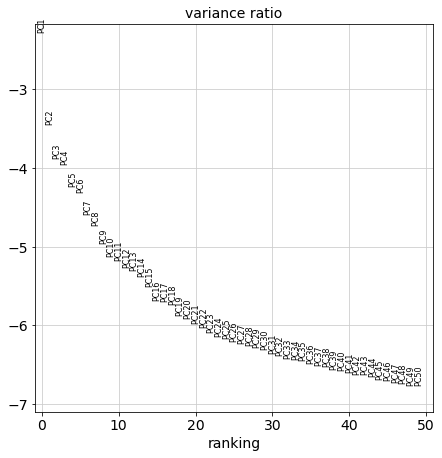

In [15]:
sc.pl.pca_variance_ratio(human, n_pcs=50, log=True)

In [16]:
sc.pp.neighbors(human, n_pcs = 25)

computing neighbors
    using 'X_pca' with n_pcs = 25
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:28)


In [17]:
sc.tl.umap(human)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:28)


/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


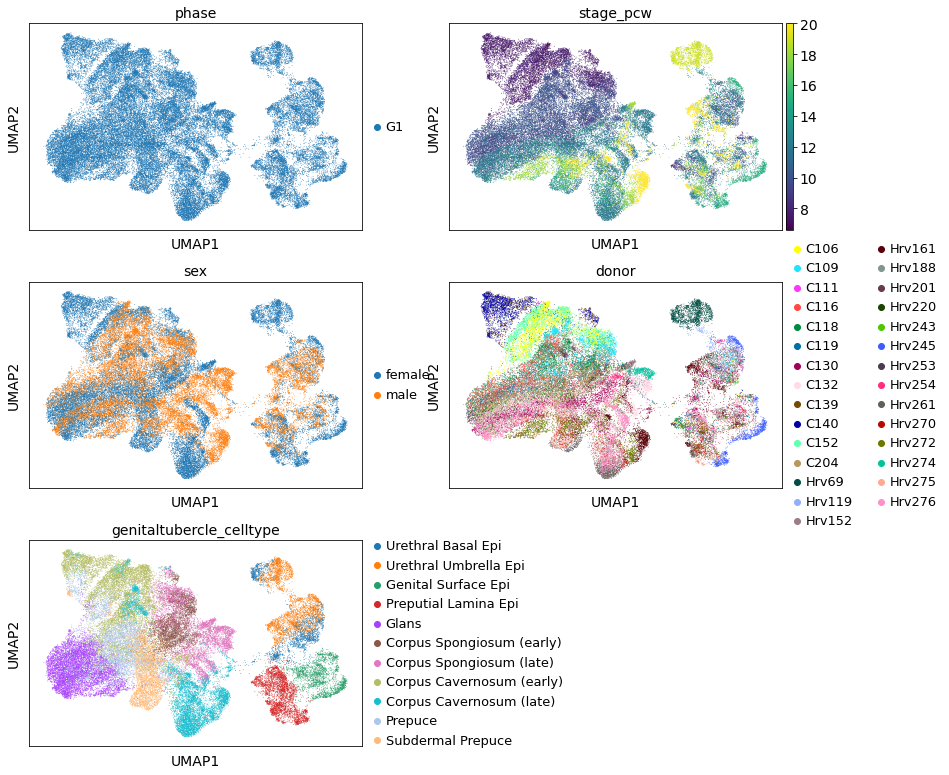

In [18]:
sc.pl.umap(human, color = ['phase', 'stage_pcw', 'sex', 'donor',
                          'genitaltubercle_celltype'], ncols = 2)

In [19]:
# Harmony integration
import rpy2.rinterface_lib.callbacks
import logging
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [20]:
# Extract PCA matrix and batch array
n_pcs = 25 # Principal components used to perform dimensionality reduction 
pca = human.obsm['X_pca'][:, 0:(n_pcs)]
batch = human.obs['donor'] # Batch ID, in this case stage

In [21]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)
set.seed(1000)
hem <- HarmonyMatrix(pca, batch, theta=0, lambda = 6, do_pca=FALSE, verbose = FALSE)  
hem = data.frame(hem)

In [22]:
# Add harmony values to the anndata object --> overwriting PCA 
human.obsm['X_pca_harmony'] = hem.values 

In [23]:
sc.pp.neighbors(human, n_pcs = n_pcs, use_rep = 'X_pca_harmony', random_state= 123)
sc.tl.umap(human, min_dist=0.6, spread = 0.8)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:29)


/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


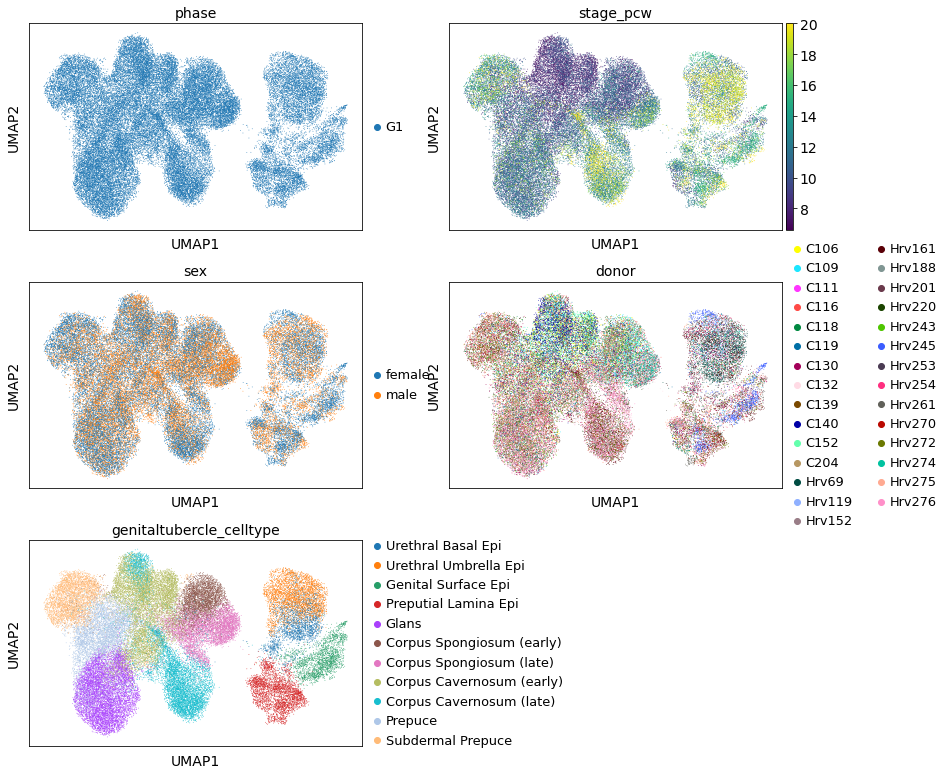

In [24]:
sc.pl.umap(human, color = ['phase', 'stage_pcw', 'sex', 'donor',
                          'genitaltubercle_celltype'], ncols = 2)

In [25]:
human.obs['human_celltype'] = human.obs['genitaltubercle_celltype']
human.obs['species'] = 'human'

In [26]:
human.write(path_to_data + "human_genital_tubercle_mpw_orthologs_with_embedding.h5ad")

In [27]:
del human.obsp

In [28]:
del human.varm

In [29]:
del human.uns

In [30]:
for c in human.obs.columns:
    if c not in ['human_celltype', 'species', 'sample', 'donor', 'stage_pcw', 'sex']:
        del human.obs[c]

In [31]:
human.obs['celltype'] = human.obs['human_celltype']

In [32]:
human.obs['celltype'].value_counts()

Corpus Cavernosum (early)    8388
Glans                        7325
Corpus Cavernosum (late)     6817
Prepuce                      5449
Corpus Spongiosum (late)     5127
Subdermal Prepuce            3940
Corpus Spongiosum (early)    3640
Urethral Umbrella Epi        3309
Preputial Lamina Epi         3172
Genital Surface Epi          2080
Urethral Basal Epi           2057
Name: celltype, dtype: int64

In [33]:
%%R -i human 
human

class: SingleCellExperiment 
dim: 2556 51304 
metadata(0):
assays(3): X raw_counts log_normalised_counts
rownames(2556): ABCG1 ABTB2 ... TNNT2 TCEA3
rowData names(302): GeneID.0 GeneName.0 ... highly_variable_nbatches
  highly_variable_intersection
colnames(51304): HD_F_GON14449733_TGTATTCTCGCTGATA
  HD_F_GON14449733_TATCAGGAGATGTAAC ...
  HD_F_GON15290560_AACCATGCAAACGTGG HD_F_GON15290560_CACCTTGTCGTCACGG
colData names(7): sample donor ... species celltype
reducedDimNames(3): PCA UMAP X_pca_harmony
altExpNames(0):


In [34]:
%%R -i path_to_data
saveRDS(human, paste0(path_to_data, "human_genital_tubercle_mpw_orthologs.rds"))

## Mouse

In [35]:
mouse = sc.read(path_to_data + "mouse_genital_tubercle_mpw_orthologs.h5ad")
mouse

AnnData object with n_obs × n_vars = 60832 × 2556
    obs: 'n_genes', 'sample', 'donor', 'age', 'sex', 'genotype', 'percent_mito', 'n_counts', 'batch', 'celltype', 'S_score', 'G2M_score', 'phase', 'leiden', 'harmonised_celltype', 'leiden_R'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'log1p'
    layers: 'log_normalised_counts

In [36]:
import anndata
mouse.X = mouse.layers['raw_counts']

In [37]:
mouse.X[20:30, 20:30].toarray()

array([[ 1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  2.,  1.,  2.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 13.,  0.,  5.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [38]:
mouse.raw = mouse.copy()

In [39]:
mouse = anndata.AnnData(X = mouse.raw.X, var = mouse.raw.var, obs = mouse.obs)

In [40]:
mouse.raw = mouse.copy()

In [41]:
mouse.layers["raw_counts"] = mouse.X.copy()

In [42]:
# Normalize and log-transform 
reptract_utils.normalize_log_transform(mouse)
mouse.layers["log_normalised_counts"] = mouse.X.copy()

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [43]:
sc.tl.pca(mouse)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:29)


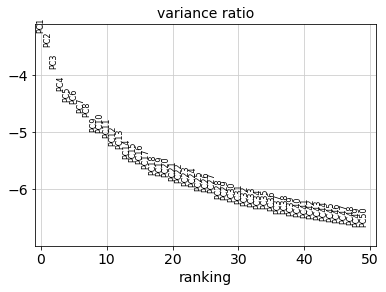

In [44]:
sc.pl.pca_variance_ratio(mouse, n_pcs=50, log=True)

In [45]:
sc.pp.neighbors(mouse, n_pcs = 25)

computing neighbors
    using 'X_pca' with n_pcs = 25
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


In [46]:
sc.tl.umap(mouse)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:37)


/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


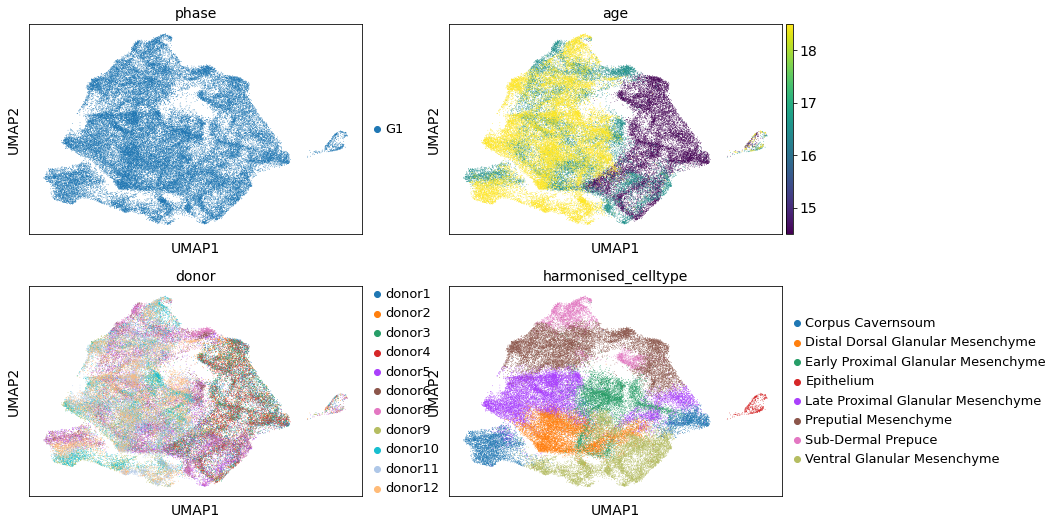

In [47]:
sc.pl.umap(mouse, color = ['phase', 'age', 'donor',
                          'harmonised_celltype'], ncols = 2)

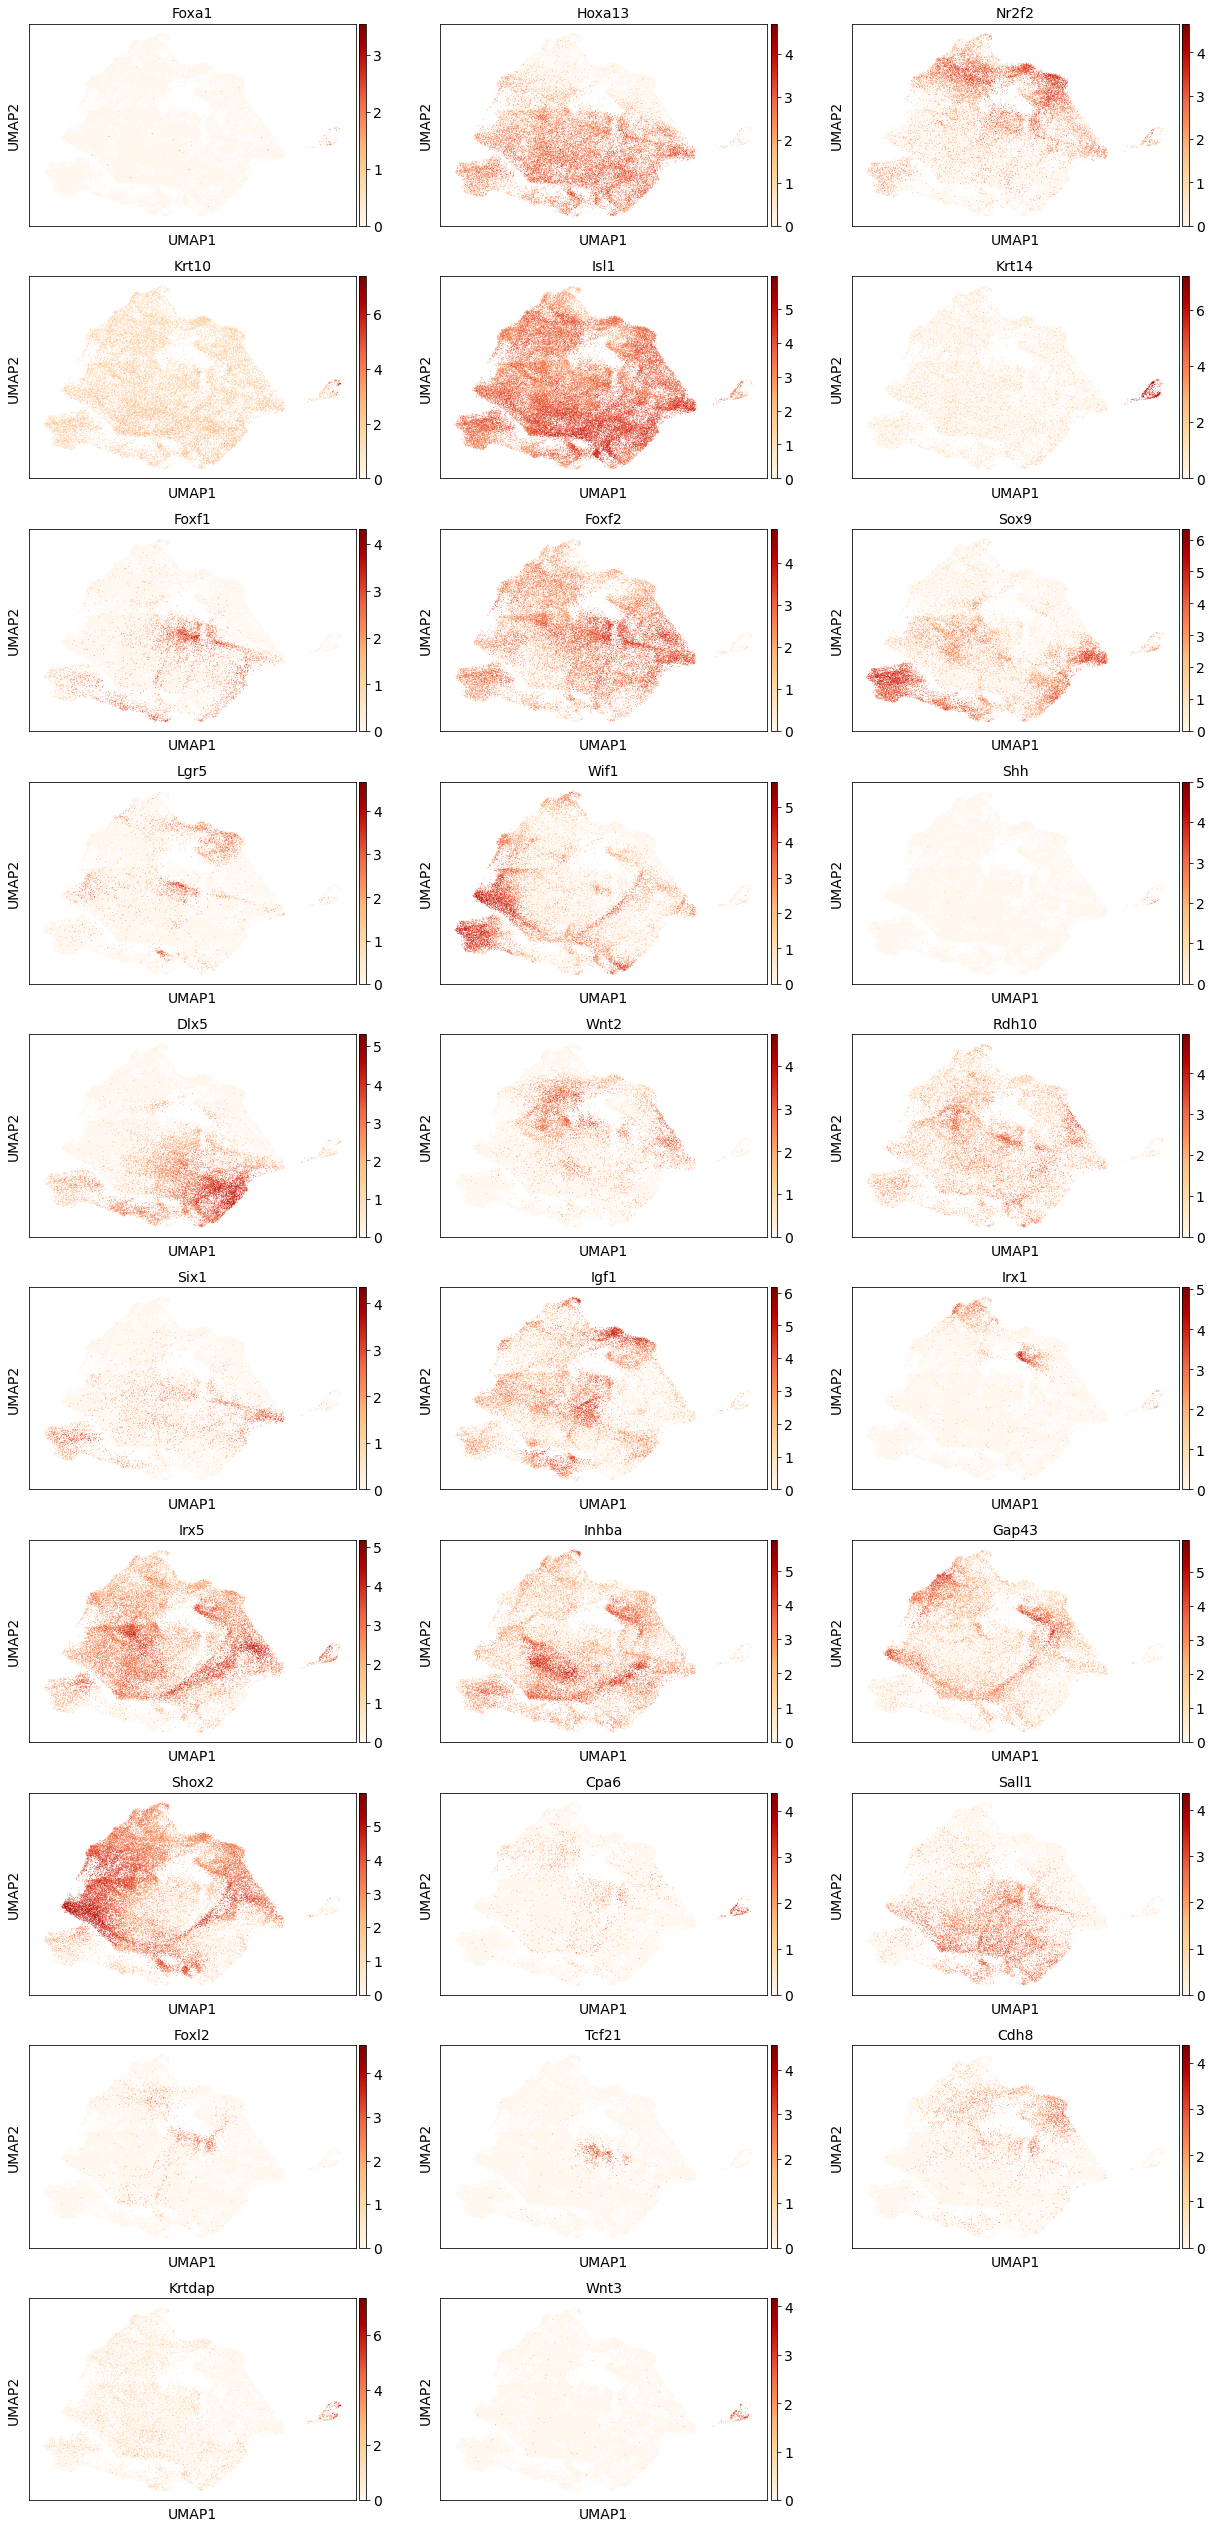

In [48]:
sc.pl.umap(mouse, color = ['Foxa1', 'Hoxa13', 'Nr2f2', 'Krt10', 'Isl1', 'Krt14', 
                            'Foxf1', 'Foxf2', 'Sox9', 'Lgr5', 
                          'Wif1', 'Shh', 'Dlx5', 'Wnt2', 'Rdh10', 'Six1', 'Igf1', 'Irx1', 
                          'Irx5', 'Inhba', 'Gap43', 'Shox2', 'Cpa6',  'Sall1', 'Foxl2', 
                          'Tcf21', 'Cdh8', 'Krtdap', 'Wnt3', ], color_map = 'OrRd', ncols = 3, use_raw = False)

In [49]:
# Extract PCA matrix and batch array
n_pcs = 25 # Principal components used to perform dimensionality reduction 
pca = mouse.obsm['X_pca'][:, 0:(n_pcs)]
batch = mouse.obs['donor'] # Batch ID, in this case stage

In [50]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)
set.seed(1000)
hem <- HarmonyMatrix(pca, batch, theta=0, lambda = 6, do_pca=FALSE, verbose = FALSE)  
hem = data.frame(hem)

In [51]:
# Add harmony values to the anndata object --> overwriting PCA 
mouse.obsm['X_pca_harmony'] = hem.values 

In [52]:
sc.pp.neighbors(mouse, n_pcs = n_pcs, use_rep = 'X_pca_harmony', random_state= 123)
sc.tl.umap(mouse, min_dist=0.6, spread = 0.8)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:04)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:37)


/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


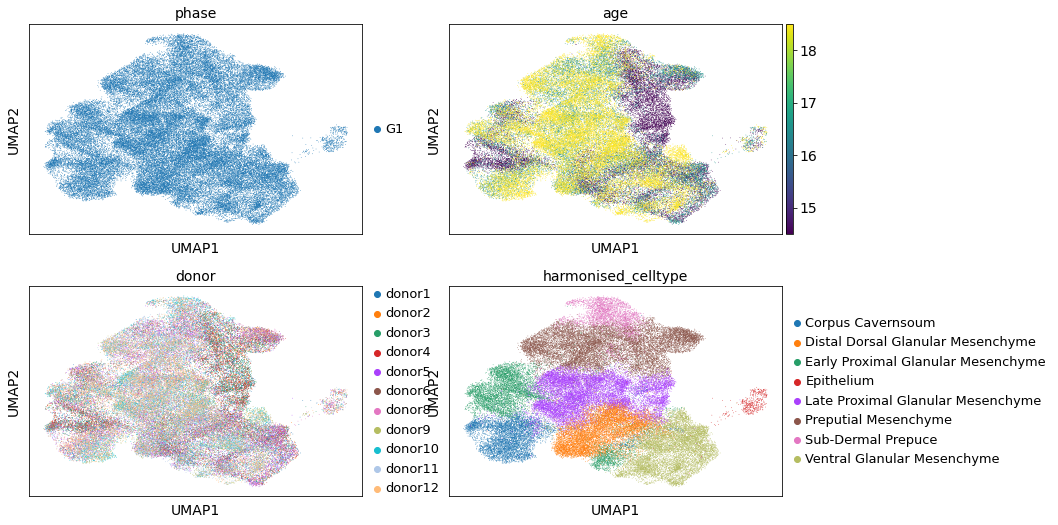

In [53]:
sc.pl.umap(mouse, color = ['phase', 'age', 'donor',
                          'harmonised_celltype'], ncols = 2)

In [54]:
mouse.obs['mouse_celltype'] = mouse.obs['harmonised_celltype']
mouse.obs['species'] = 'mouse'

In [55]:
mouse.write(path_to_data + "mouse_genital_tubercle_mpw_orthologs_with_embedding.h5ad")

In [56]:
del mouse.obsp

In [57]:
del mouse.varm
del mouse.uns

In [58]:
for c in mouse.obs.columns:
    if c not in ['mouse_celltype', 'species', 'sample', 'donor', 'age', 'sex']:
        del mouse.obs[c]

In [59]:
mouse

AnnData object with n_obs × n_vars = 60832 × 2556
    obs: 'sample', 'donor', 'age', 'sex', 'mouse_celltype', 'species'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    obsm: 'X_pca', 'X_umap', 'X_pca_harmony'
    layers: 'raw_counts', 'log_normalised_counts'

In [60]:
mouse.obs['celltype'] = mouse.obs['mouse_celltype']

In [61]:
mouse.obs['celltype'].value_counts()

Late Proximal Glanular Mesenchyme     13182
Preputial Mesenchyme                  13117
Ventral Glanular Mesenchyme            9258
Distal Dorsal Glanular Mesenchyme      8946
Early Proximal Glanular Mesenchyme     6746
Corpus Cavernsoum                      5748
Sub-Dermal Prepuce                     3311
Epithelium                              524
Name: celltype, dtype: int64

In [62]:
%%R -i mouse
mouse

class: SingleCellExperiment 
dim: 2556 60832 
metadata(0):
assays(3): X raw_counts log_normalised_counts
rownames(2556): Abcg1 Abtb2 ... Tnnt2 Tcea3
rowData names(43): gene_ids.0 feature_types.0 ...
  highly_variable_nbatches highly_variable_intersection
colnames(60832): GSM5324563_E14.5_male_genitalia_1_AAACCCAAGAAGGTAG
  GSM5324563_E14.5_male_genitalia_1_AAACCCAAGTCCCAAT ...
  GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCATAGGCT
  GSM5324574_E18.5_female_genitalia_2_TTTGTTGTCATTTCCA
colData names(7): sample donor ... species celltype
reducedDimNames(3): PCA UMAP X_pca_harmony
altExpNames(0):


In [63]:
%%R -i path_to_data
saveRDS(mouse, paste0(path_to_data, "mouse_genital_tubercle_mpw_orthologs.rds"))

In [128]:
mouse = sc.read(path_to_data + "mouse_genital_tubercle_mpw_orthologs_with_embedding.h5ad")